In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### 데이터 준비

In [20]:
us_arrests = pd.read_csv('USArrests.csv', index_col=0)
us_arrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


### 주성분 분석 (PCA)

In [21]:
## PCA 객체 생성, 주성분 수는 데이터의 차원과 동일하게 설정
pca = PCA()
pca.fit(us_arrests)

PCA()

In [22]:
## PCA 결과 요약 출력 (R의 summary(princomp)와 유사)
print("\n주성분 분석 결과 요약:")
print("주성분의 분산 비율 (Explained Variance Ratio):")
print(pca.explained_variance_ratio_)
print("\n누적 분산 비율 (Cumulative Explained Variance Ratio):")
print(np.cumsum(pca.explained_variance_ratio_))

## PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca.components_.T, 
                      columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                      index=us_arrests.columns)
pca_df


주성분 분석 결과 요약:
주성분의 분산 비율 (Explained Variance Ratio):
[9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]

누적 분산 비율 (Cumulative Explained Variance Ratio):
[0.96553422 0.99335156 0.99915109 1.        ]


,PC1,PC2,PC3,PC4
Murder,0.041704,0.044822,0.079891,0.994922
Assault,0.995221,0.058760,-0.067570,-0.038938
UrbanPop,0.046336,-0.976857,-0.200546,0.058169
Rape,0.075156,-0.200718,0.974081,-0.072325


In [23]:
## 주성분 점수 (Scores) 계산
scores = pca.transform(us_arrests)
scores_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                         index=us_arrests.index)
scores_df.head()

,PC1,PC2,PC3,PC4
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


### 주성분 분석 (PCA) 시각화

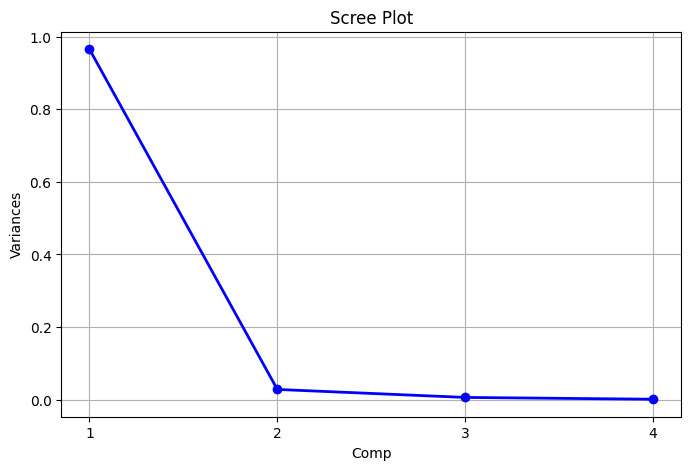

In [24]:
## Scree Plot (분산 비율 시각화)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Comp')
plt.ylabel('Variances')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

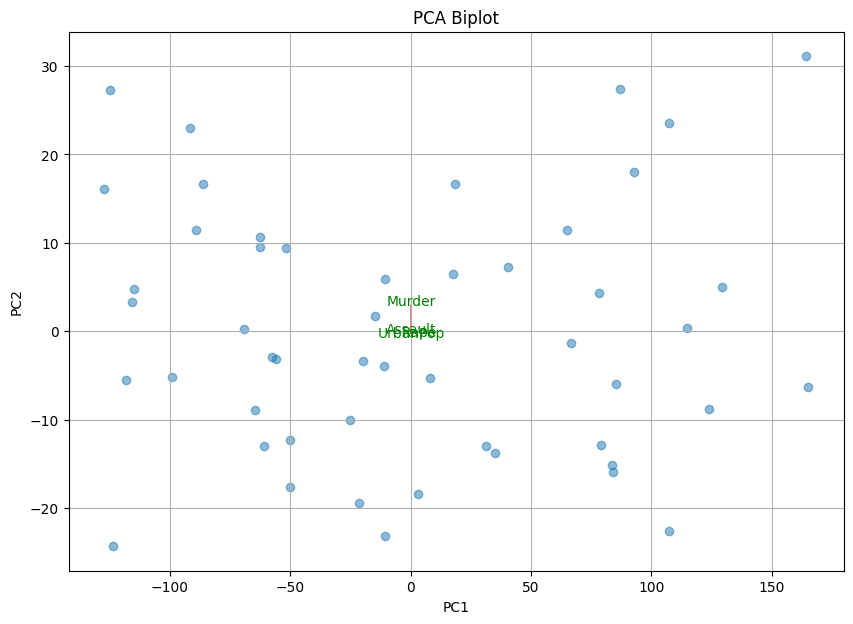

In [25]:
## Biplot (점수와 로딩을 함께 시각화)
def biplot(scores, coeff, labels=None):
    plt.figure(figsize=(10,7))
    xs = scores[:,0]
    ys = scores[:,1]
    plt.scatter(xs, ys, alpha=0.5, label='Observations')
    
    ## 벡터의 길이를 조정하기 위한 스케일 팩터
    scale = 3
    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0,i]*scale, coeff[1,i]*scale, 
                  color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[0,i]*scale*1.15, coeff[1,i]*scale*1.15, 
                     us_arrests.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[0,i]*scale*1.15, coeff[1,i]*scale*1.15, 
                     labels[i], color='g', ha='center', va='center')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.show()

biplot(scores, pca.components_.T, labels=us_arrests.columns)

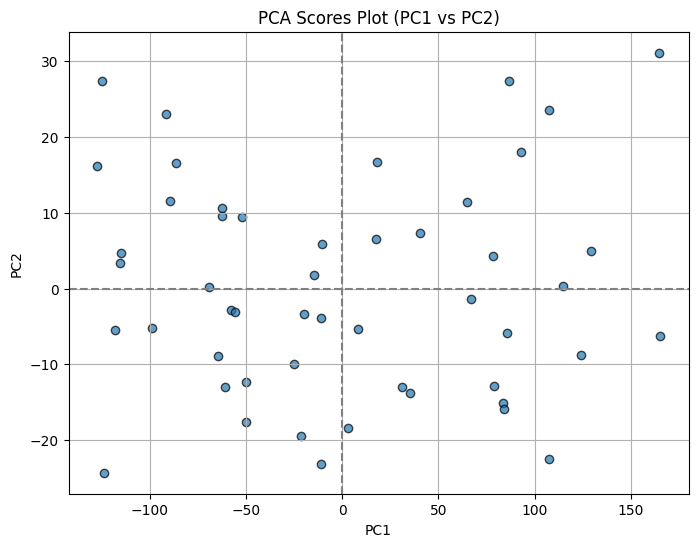

In [16]:
## 주성분 점수 산포도 (PC1 vs PC2)
plt.figure(figsize=(8,6))
plt.scatter(scores[:,0], scores[:,1], alpha=0.7, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot (PC1 vs PC2)')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True)
plt.show()